In [1]:
import pandas as pd
import numpy as np

In [2]:
trn = pd.read_csv('data/train.csv', na_values=['-1', '-1.0'])
tst = pd.read_csv('data/test.csv', na_values=['-1', '-1.0'])

# 기초 통계로 데이터 살펴보기

In [3]:
print(trn.shape, tst.shape)

(595212, 59) (892816, 58)


In [4]:
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


대부분의 변수가 수치형이며 변수명이 'ps_ind_..' 형태로 익명화되어 있음

In [5]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

'_bin'로 끝나는 변수는 이진(binary) 변수이고, '_cat'로 끝나는 변수는 범주형(categorical) 변수
'-1' 값은 결측값을 의미

In [6]:
np.unique(trn['target'])

array([0, 1], dtype=int64)

In [7]:
#예측해야 할 타겟 변수의 분포 살펴보기
1.0 * sum(trn['target'])/trn.shape[0]

0.036447517859182946

타겟 변수의 고유값은 보험 청구 여부를 나타내는 [0,1] 중 하나의 값을 가지는 이진변수이며, 전체 데이터 중 3.6%의 운전자가 보험 청구를 진행했다. 문제 특성상, 타겟 변수가 1일 확률이 매우 낮은 불균형한 데이터

# 시각화로 데이터 살펴보기

In [9]:
import matplotlib
import matplotlib.pyplot as plt
#jupyter notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline
import seaborn as sns

In [10]:
trn.columns.values

array(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07',
       'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_

In [11]:
#익명화된 변수를 데이터 타입 기준으로 이진 변수, 범주형 변수, 정수형 변수, 소수형 변수 4개의 그룹으로 나누기
binary = ['ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin' ]
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat']
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15',
        'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07',
       'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
floats = ['ps_reg_01','ps_reg_02', 'ps_reg_03',
         'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
         'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']

In [12]:
len(binary) + len(category) + len(integer) + len(floats)

57

## 단일 변수 히스토그램

In [13]:
#데이터 시각화를 위하여 훈련 데이터와 테스트 데이터를 단일 데이터로 통합

#테스트 데이터의 'target' 변수를 결측값으로 설정
tst['target'] = np.nan

#훈련 데이터와 테스트 데이터를 통합한 새로운 데이터(df)를 생성
df = pd.concat([trn, tst], axis=0)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [15]:
#히스토그램 그래프 시각화를 위한 함수
def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()

def dist_plot(col, data):
    f, ax = plt.subplots(figsize=(10,5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)
    plt.show()

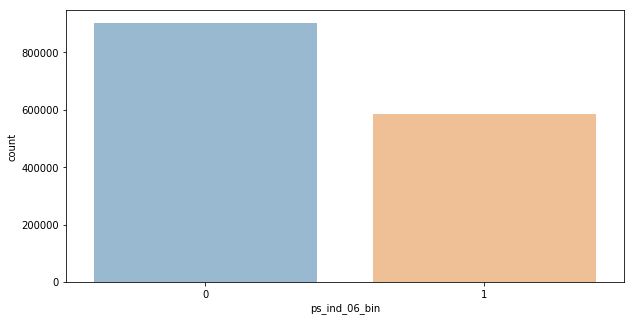

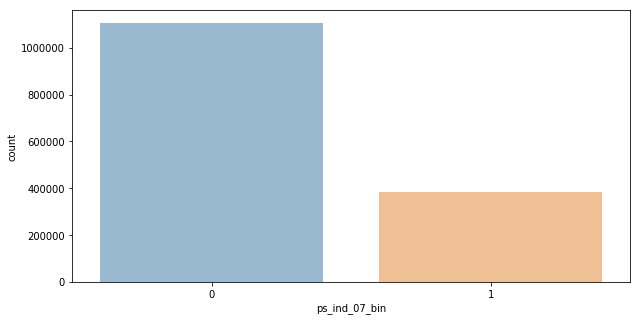

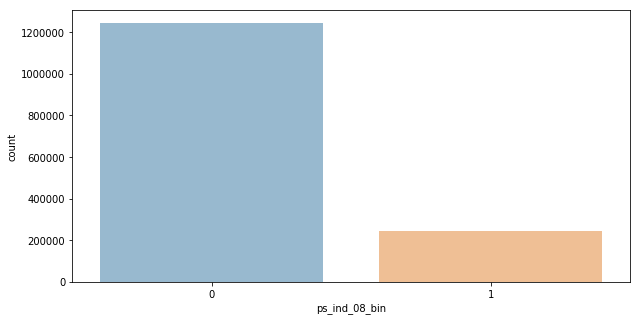

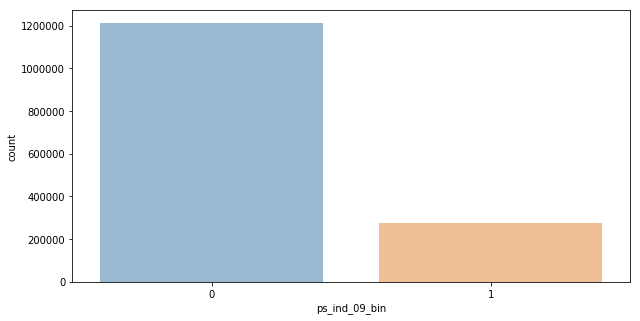

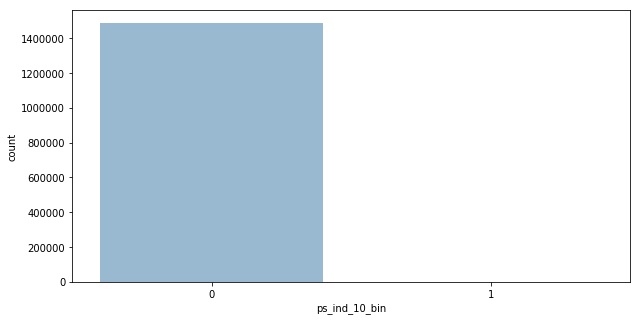

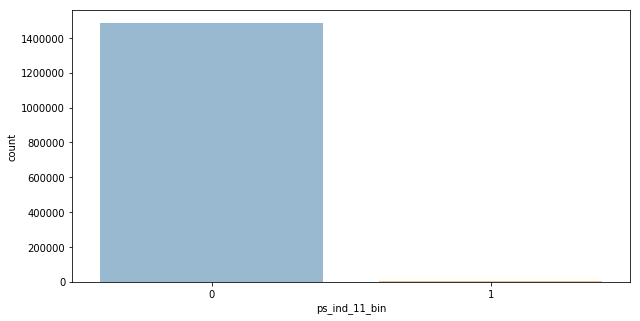

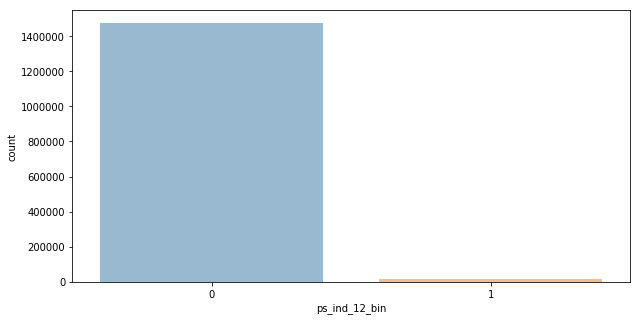

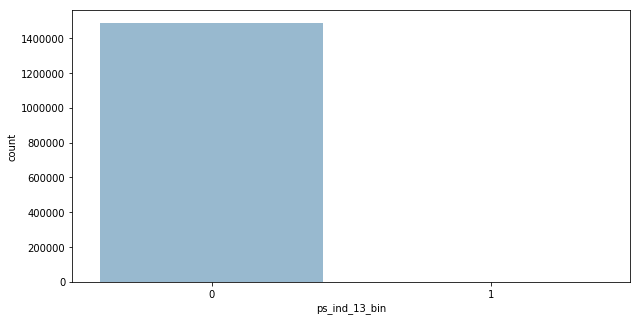

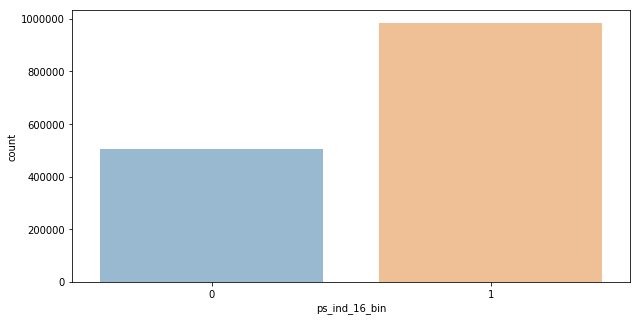

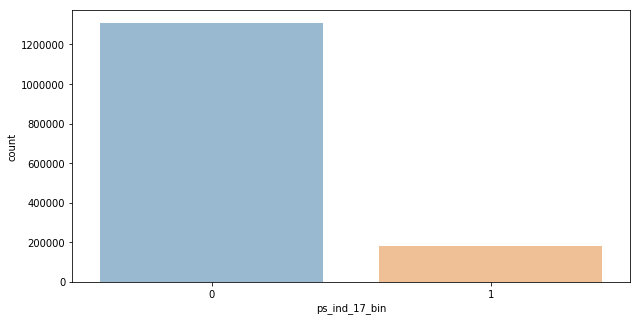

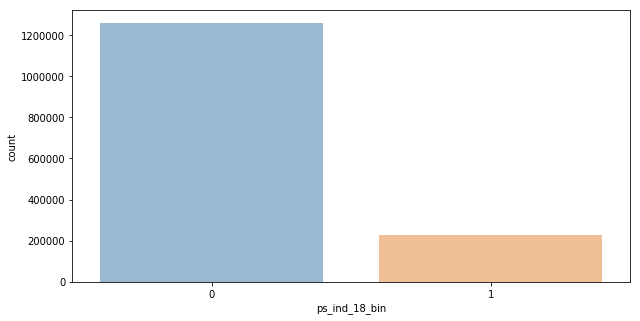

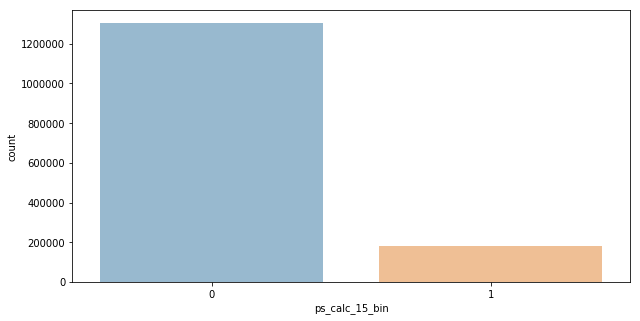

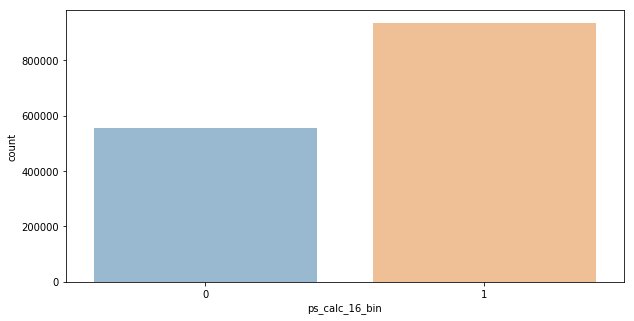

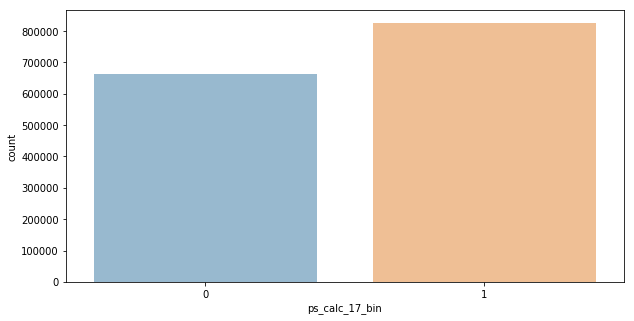

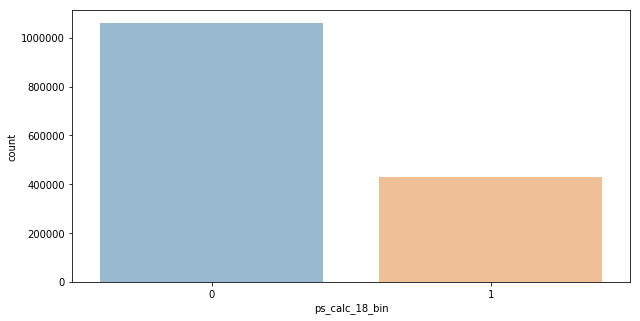

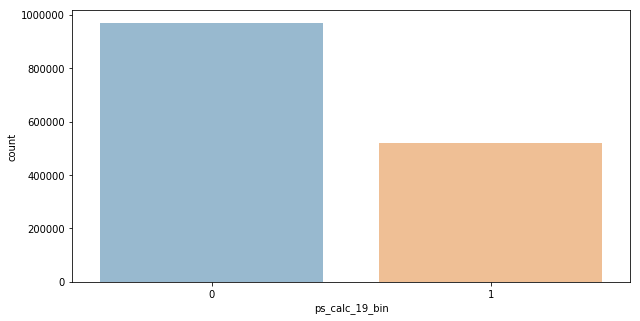

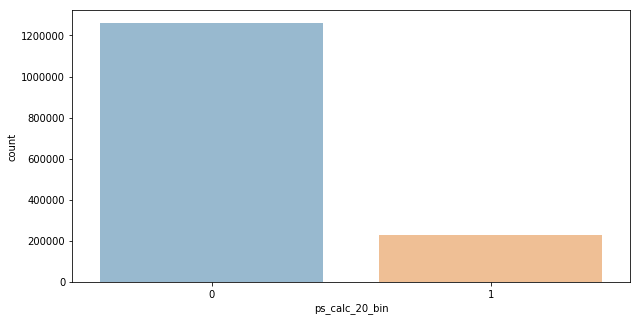

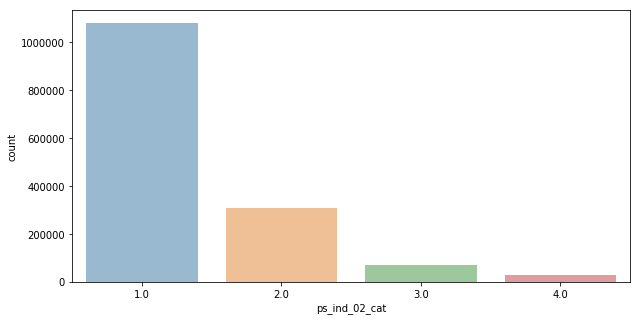

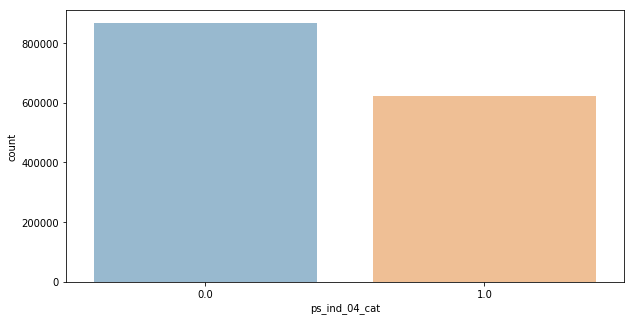

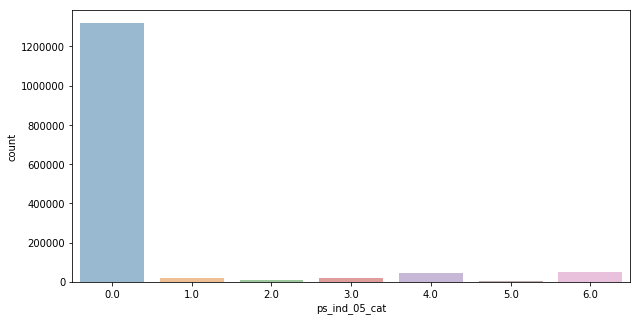

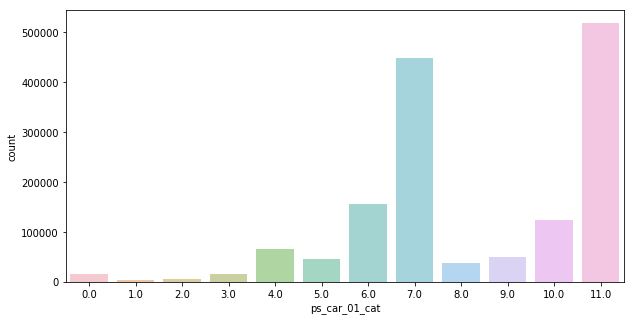

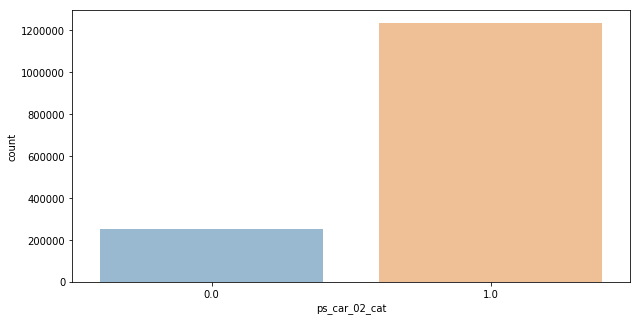

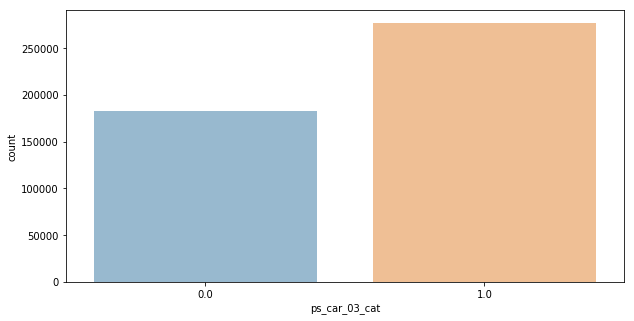

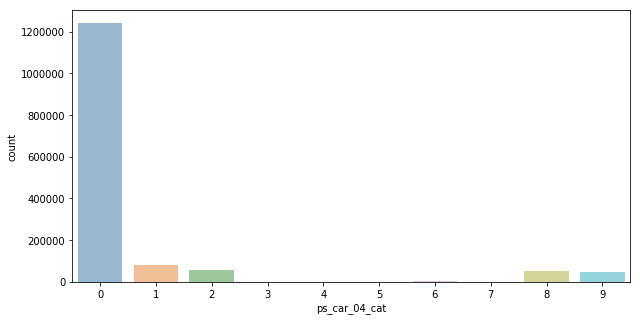

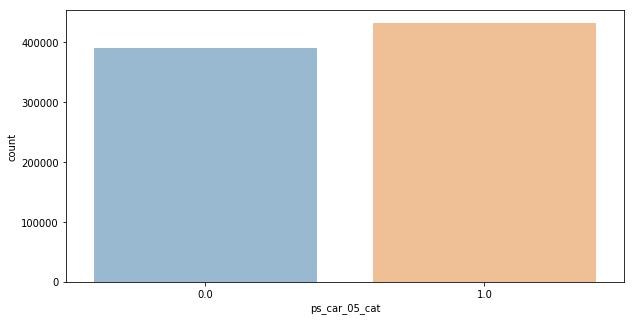

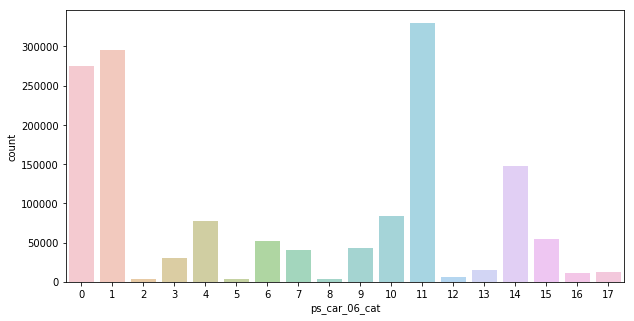

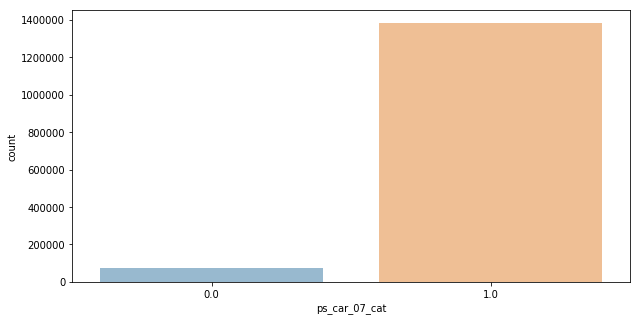

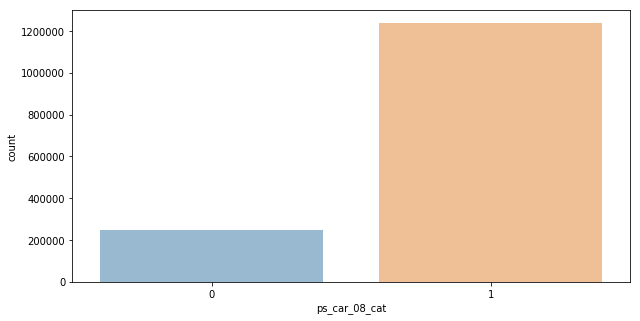

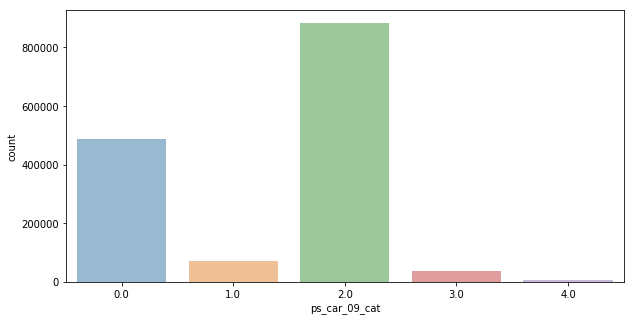

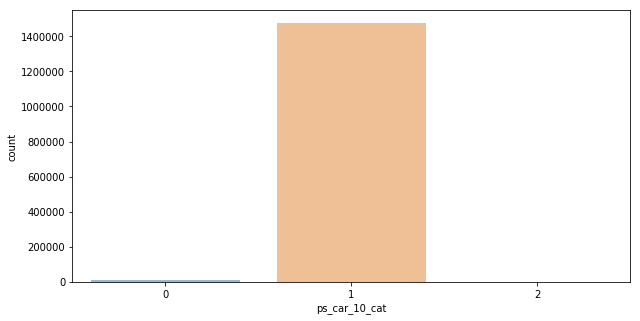

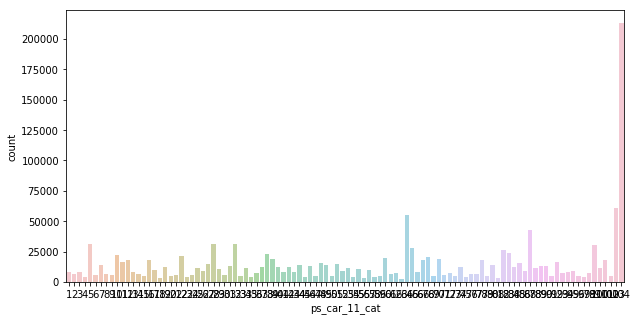

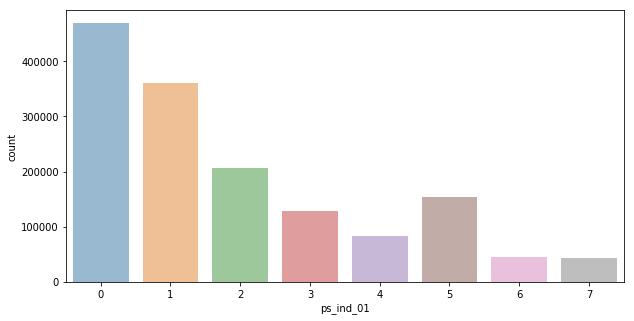

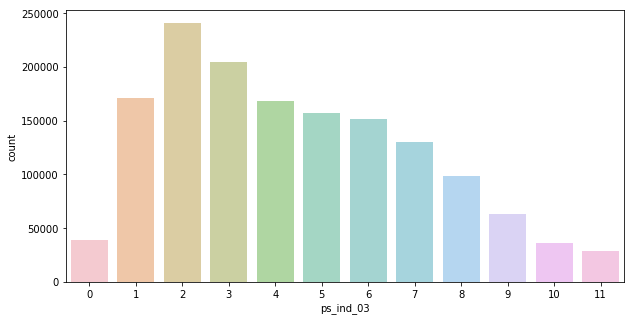

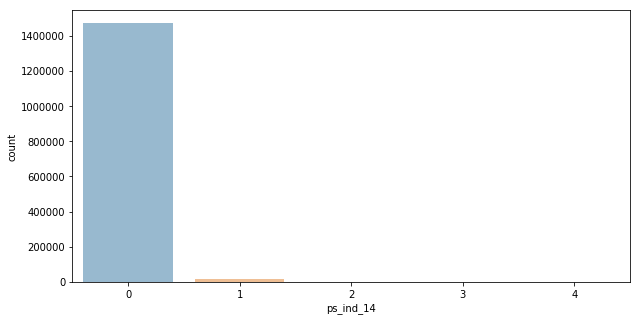

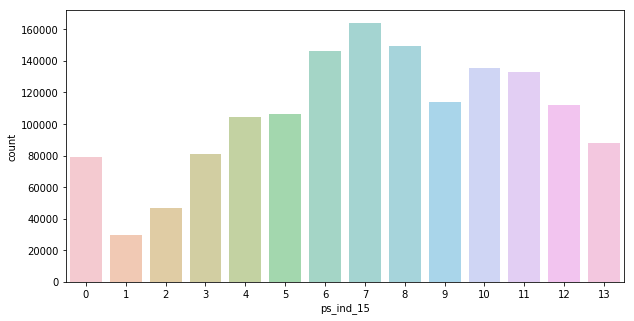

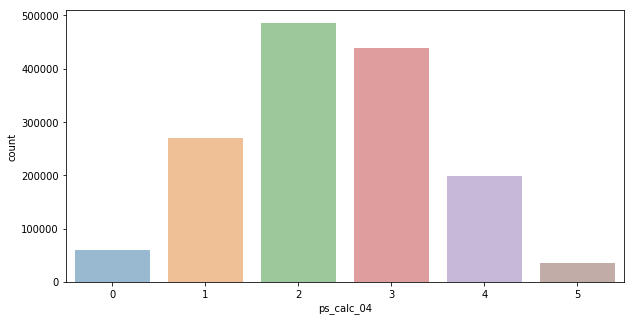

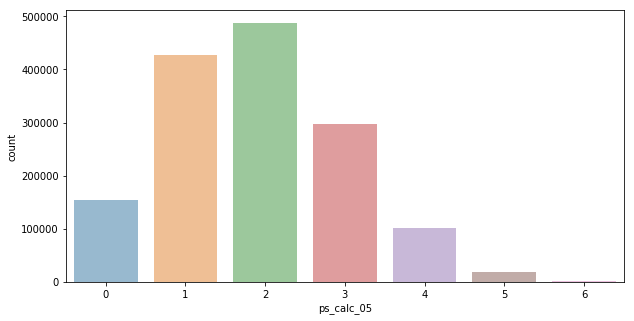

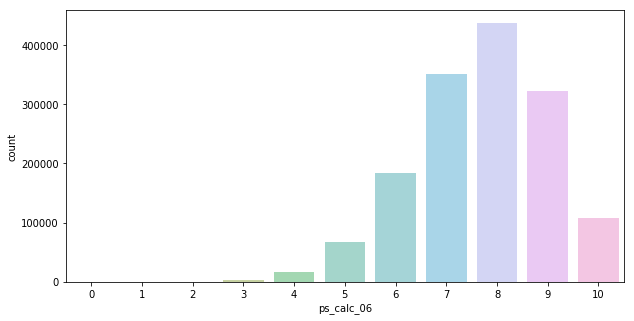

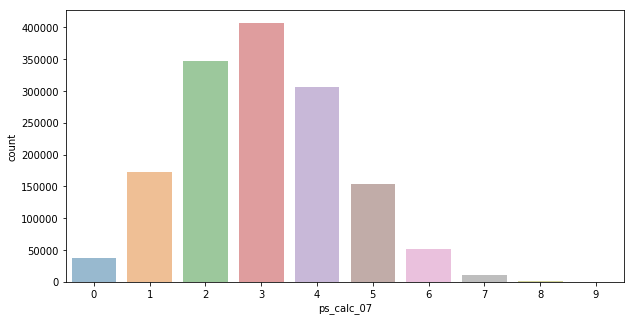

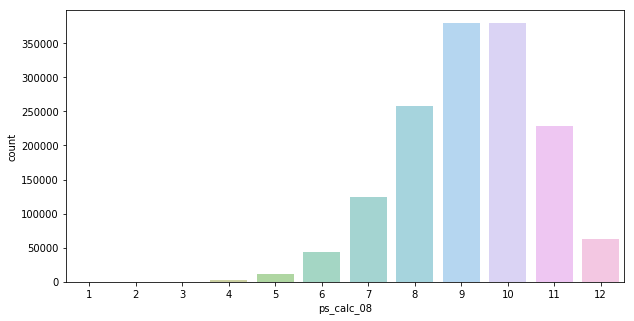

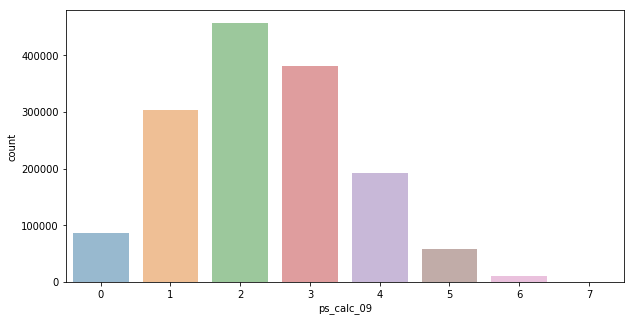

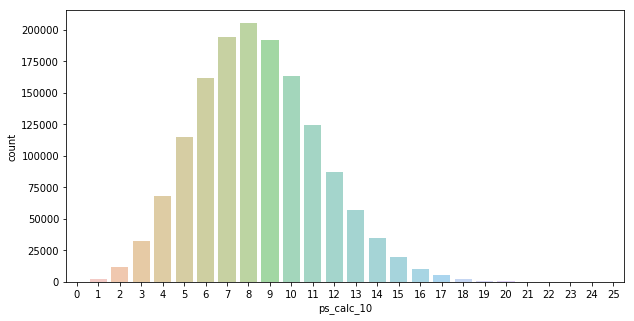

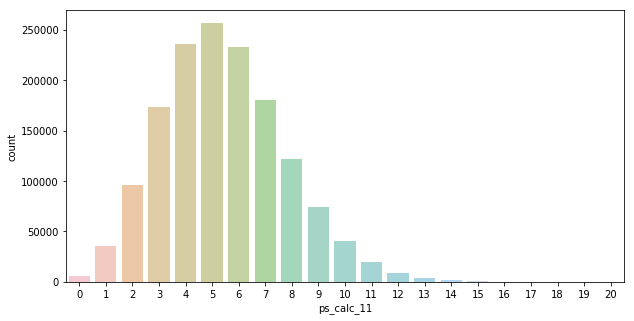

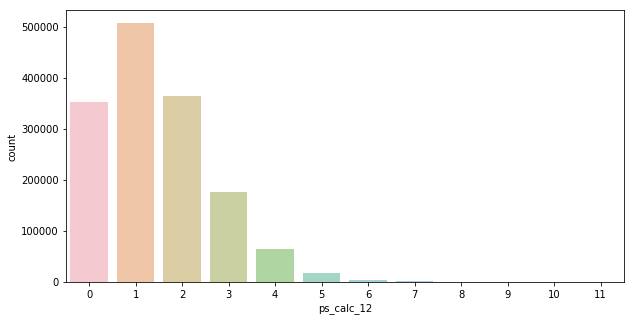

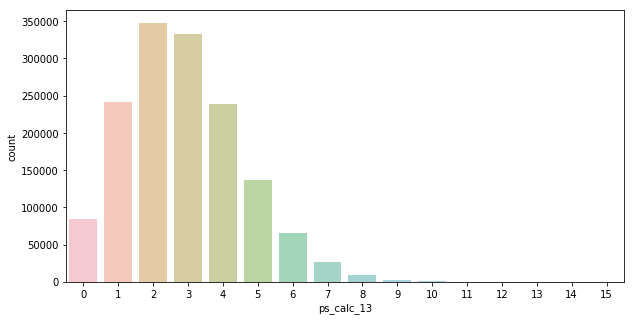

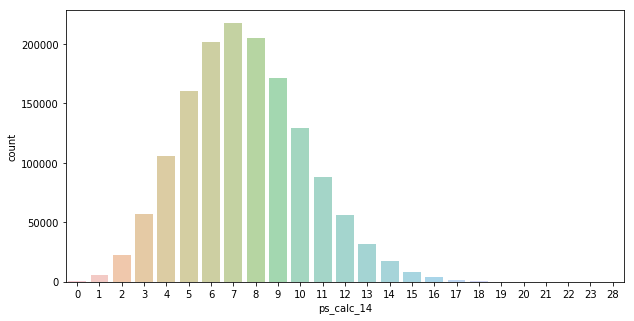

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


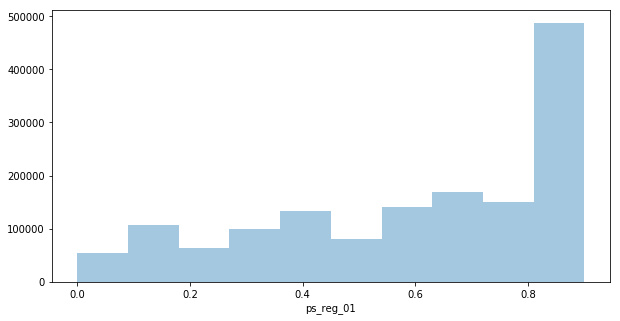

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


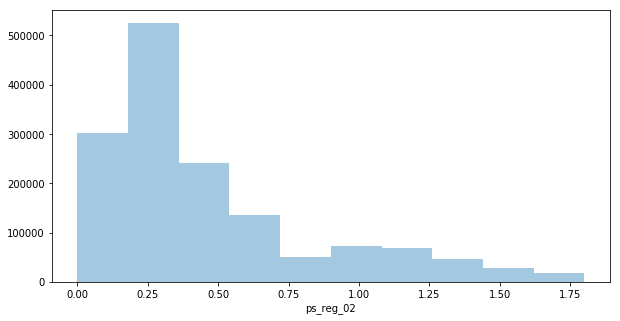

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


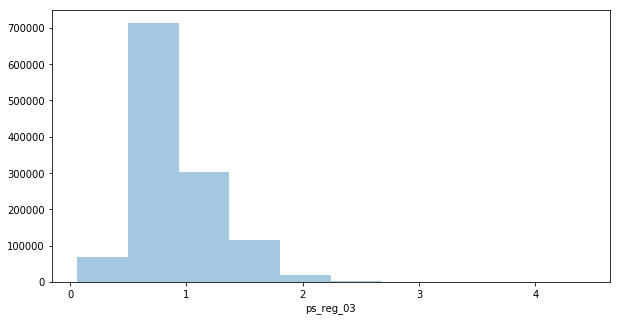

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


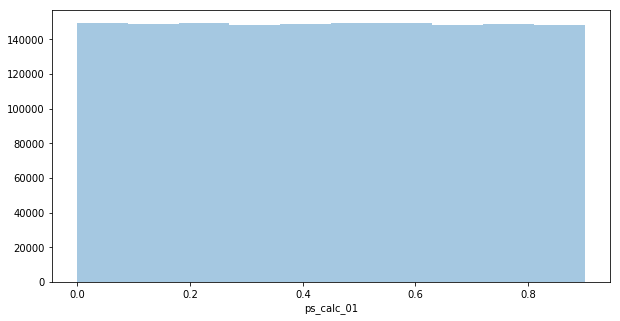

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


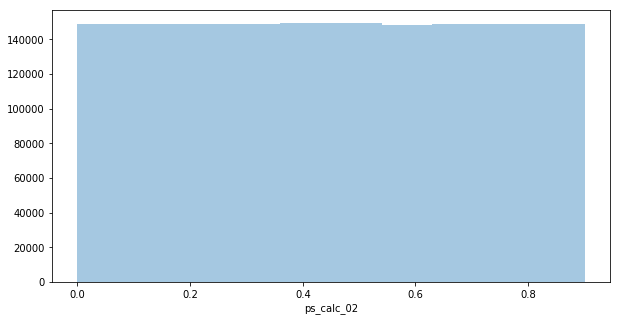

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


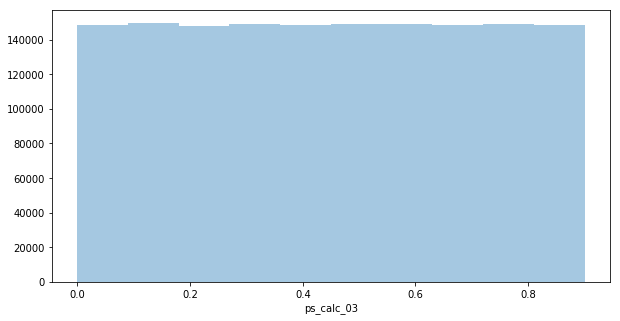

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


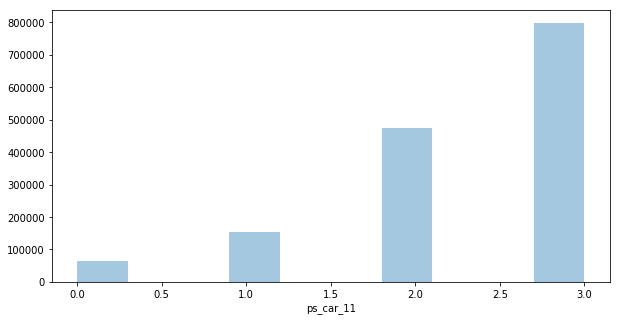

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


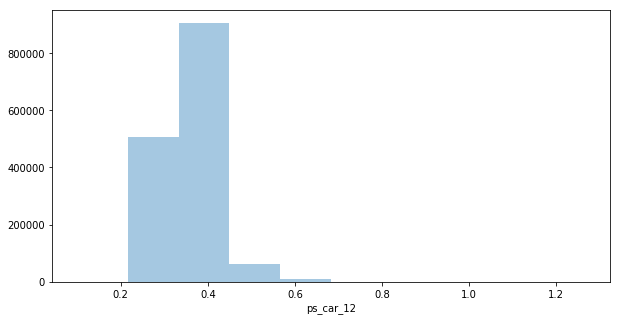

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


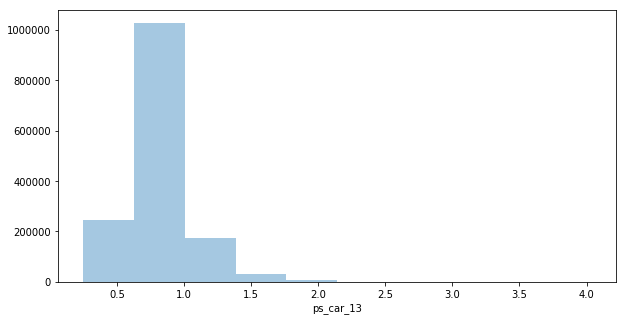

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


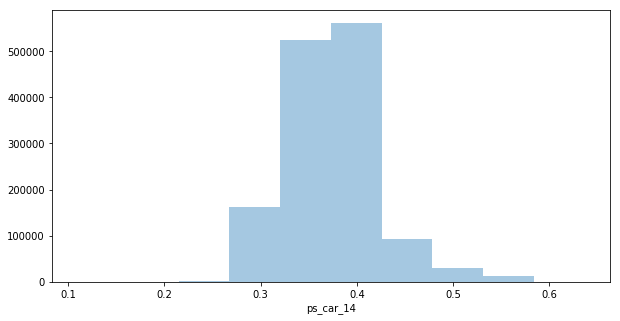

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


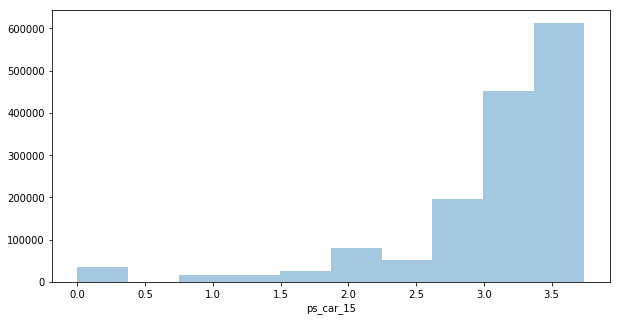

In [16]:
#이진 변수, 범주형 변수 그리고 정수형 변수를 시각화
for col in binary + category + integer:
    bar_plot(col, df)
    
#소수형 변수를 시각화
for col in floats:
    dist_plot(col, df)

모든 변수가 익명화되어 있기 때문에, 변수의 분포 및 빈도 시각화만으로 데이터를 깊이 있게 이해하기에는 한계가 있음

## 변수 간 상관관계

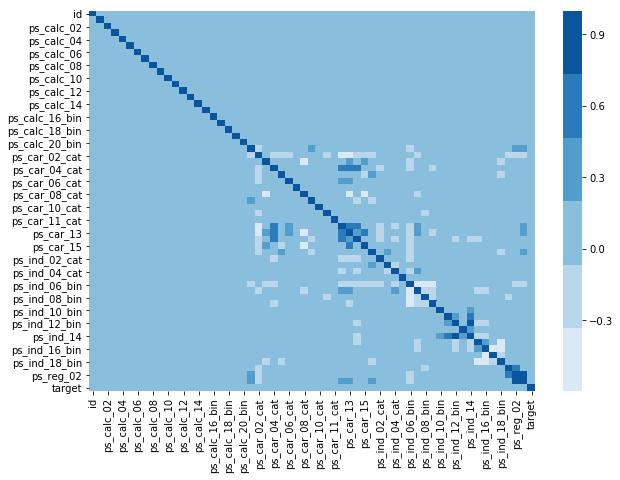

In [17]:
#전체 변수에 대한 상관관계 heatmap 그래프 시각화
corr = df.corr()

cmap = sns.color_palette('Blues')
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, cmap=cmap)

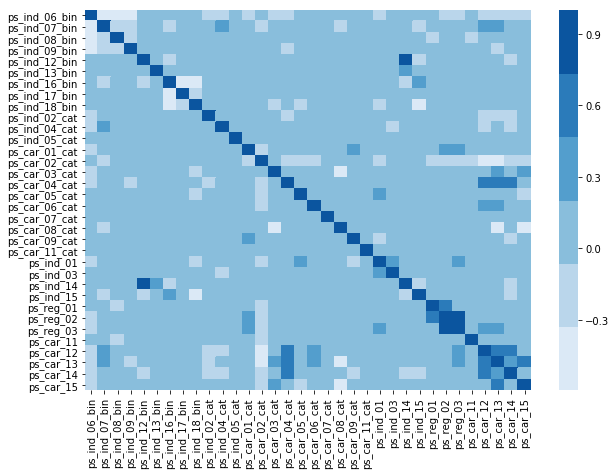

In [18]:
#일부 변수만 추출
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
            'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
            'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',
            'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
            'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat',
            'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15',
            'ps_reg_01','ps_reg_02', 'ps_reg_03',
            'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'
           ]

#일부 변수에 대한 상관관계 heatmap 그래프 시각화
corr_sub = df[features].corr()
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr_sub, cmap=cmap)

In [23]:
corr['ps_ind_14']

id               -0.001280
ps_calc_01        0.000423
ps_calc_02       -0.000146
ps_calc_03       -0.000164
ps_calc_04       -0.000324
ps_calc_05        0.000290
ps_calc_06       -0.000312
ps_calc_07        0.000318
ps_calc_08        0.002066
ps_calc_09        0.000429
ps_calc_10        0.000463
ps_calc_11       -0.000477
ps_calc_12       -0.000696
ps_calc_13        0.000546
ps_calc_14       -0.000427
ps_calc_15_bin   -0.000260
ps_calc_16_bin   -0.000266
ps_calc_17_bin   -0.000248
ps_calc_18_bin   -0.000165
ps_calc_19_bin    0.000487
ps_calc_20_bin    0.000096
ps_car_01_cat     0.017437
ps_car_02_cat    -0.018400
ps_car_03_cat    -0.052108
ps_car_04_cat     0.029158
ps_car_05_cat    -0.016583
ps_car_06_cat     0.005640
ps_car_07_cat    -0.012798
ps_car_08_cat    -0.011827
ps_car_09_cat     0.044349
ps_car_10_cat    -0.006727
ps_car_11         0.005456
ps_car_11_cat     0.011664
ps_car_12         0.020406
ps_car_13         0.022482
ps_car_14        -0.075764
ps_car_15        -0.003496
p

일반적으로 0.95 이상의 상관관계를 가질 경우, 변수 하나를 제거한다. 이번 데이터에서는 최고 0.89 수준의 상관관계이기에, 별도로 제거하지 않고 진행하도록 한다.

## 단일 변수 vs 타겟 변수

'단일 변수 vs 타겟 변수' 비율에 대한 시각화는 변수들의 예측 능력을 가늠하기 위한 시각화이다. 변수 예측 능력의 통계적 유효성을 확인하기 위하여, 변수의 고유값별로 95%의 신뢰구간을 함께 시각화한다.

C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


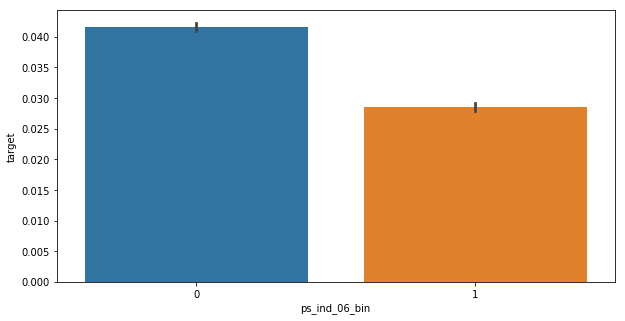

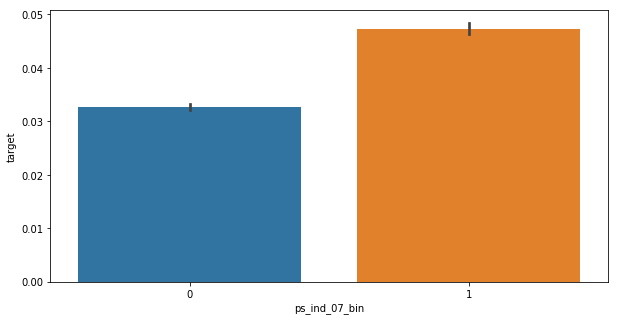

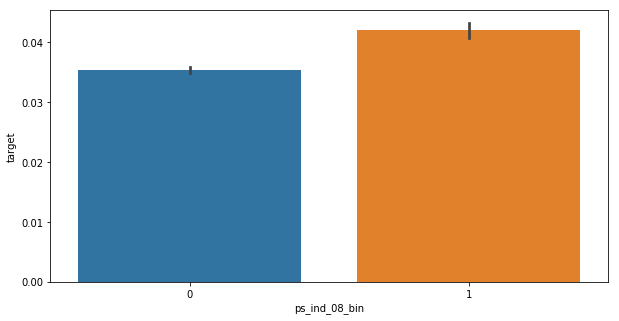

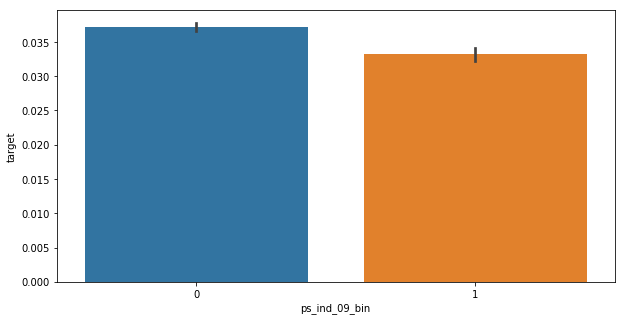

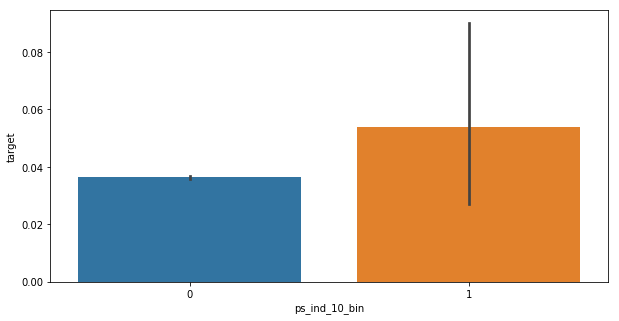

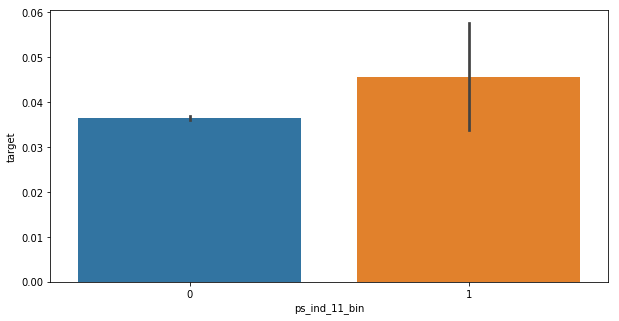

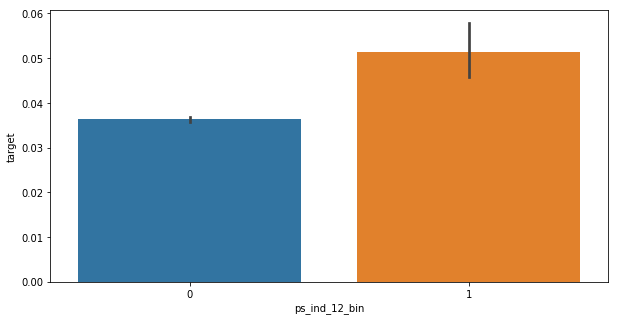

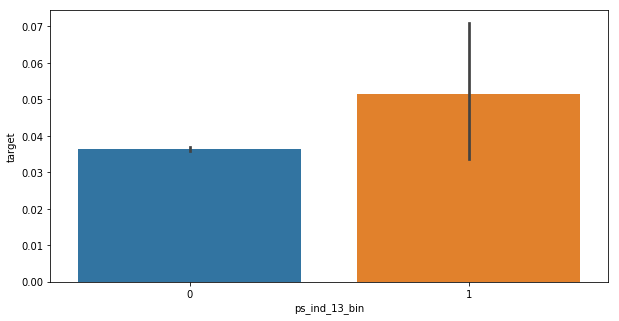

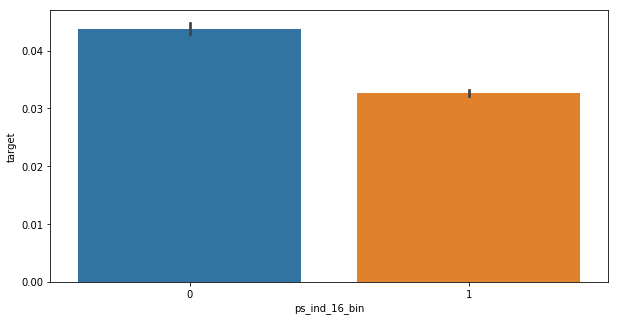

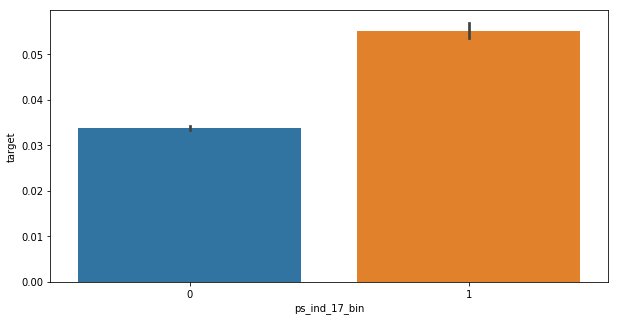

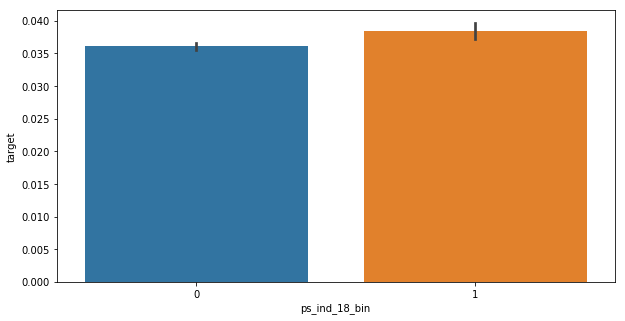

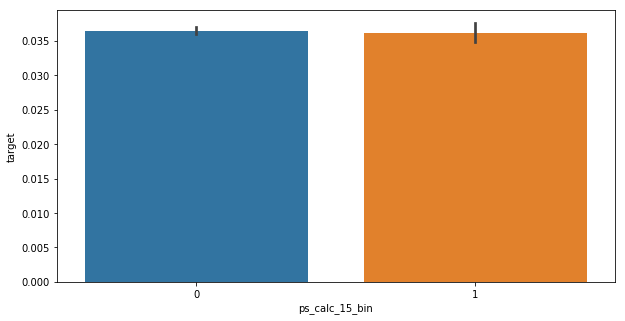

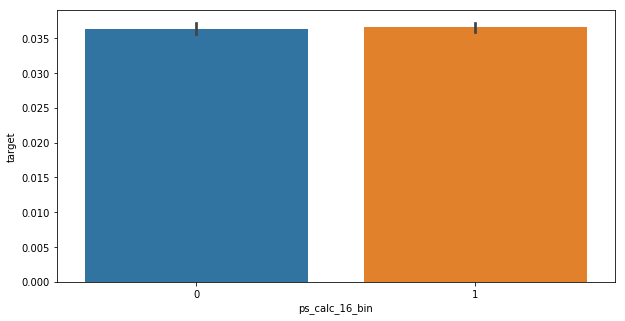

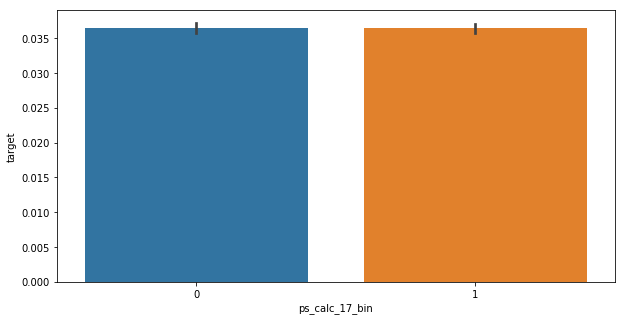

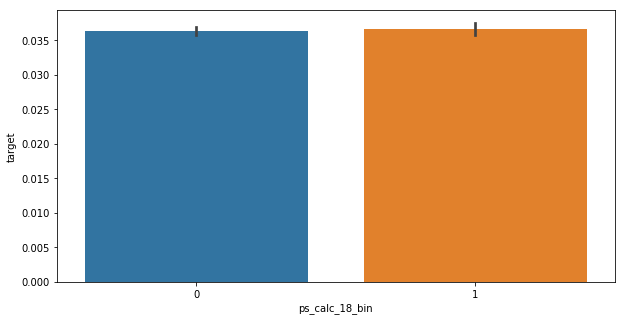

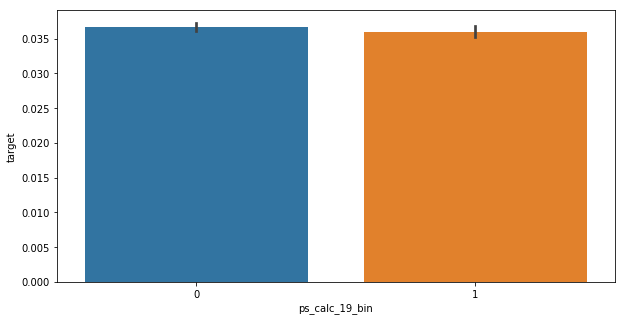

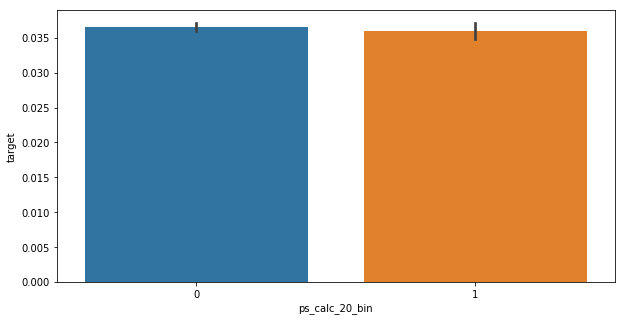

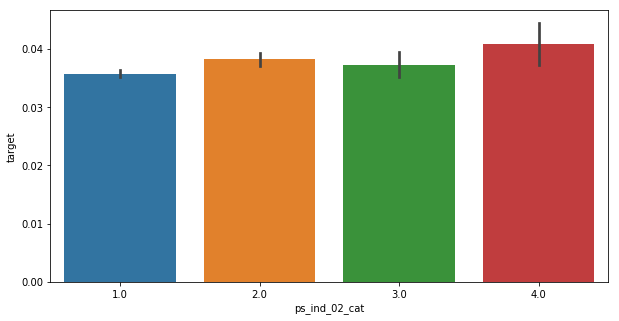

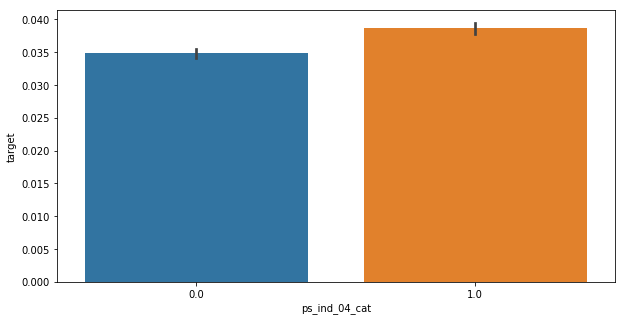

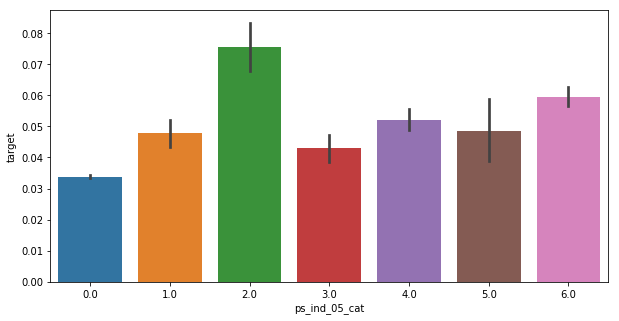

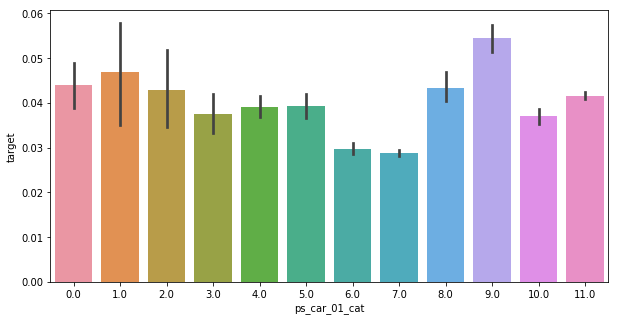

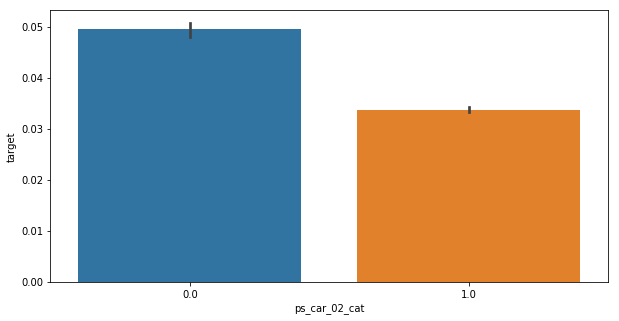

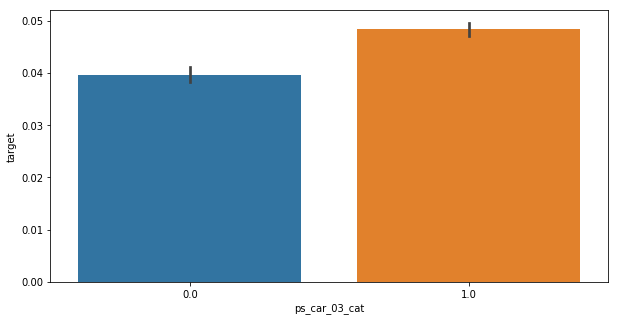

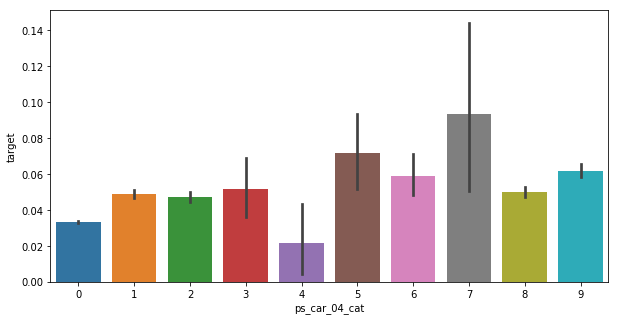

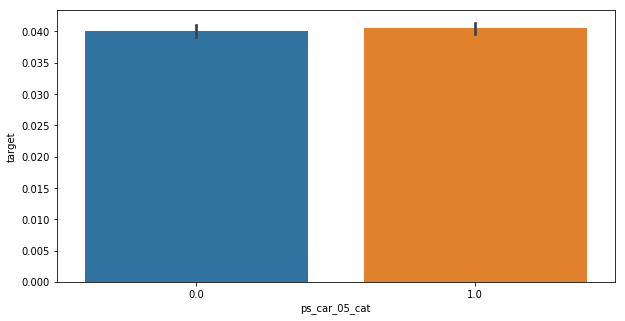

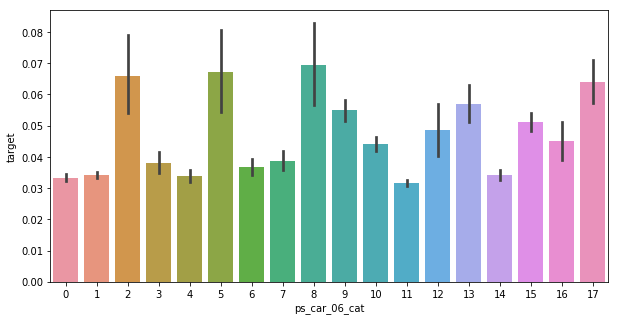

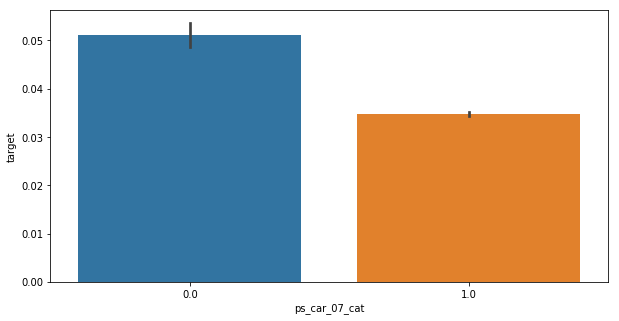

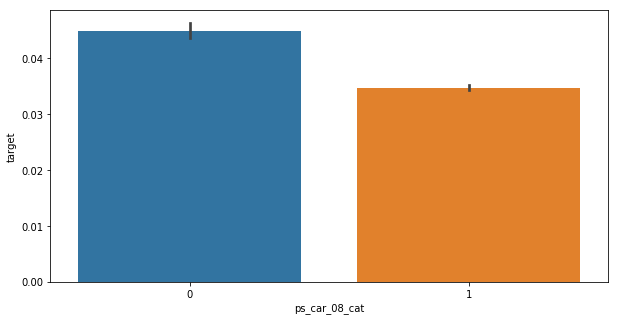

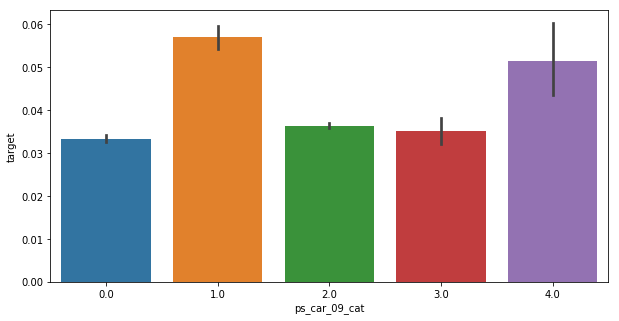

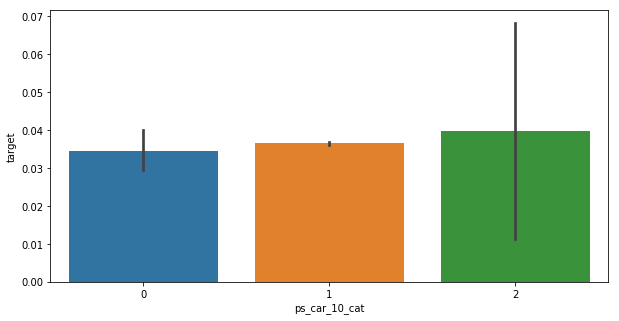

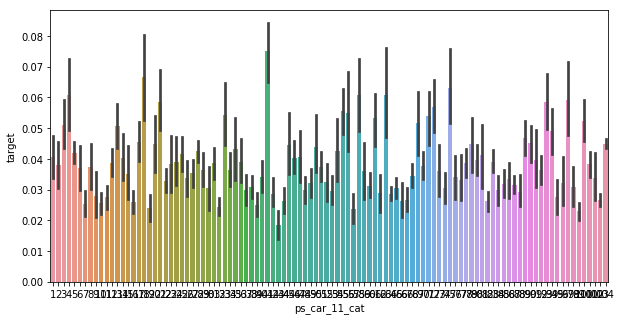

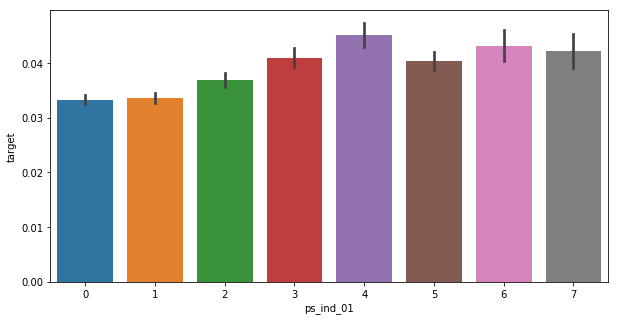

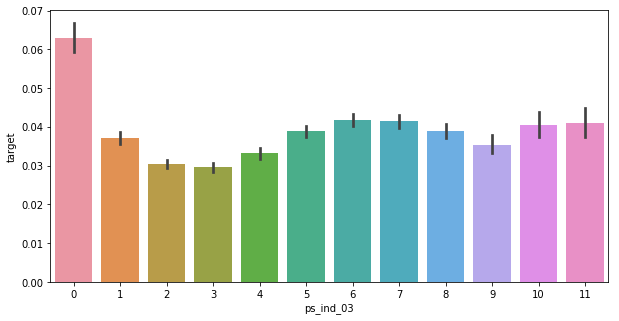

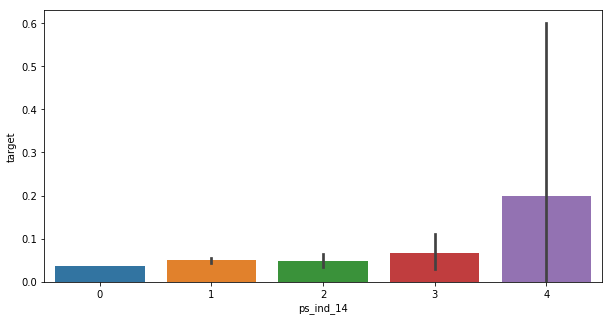

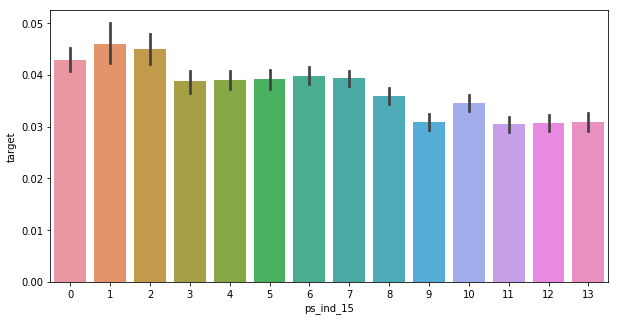

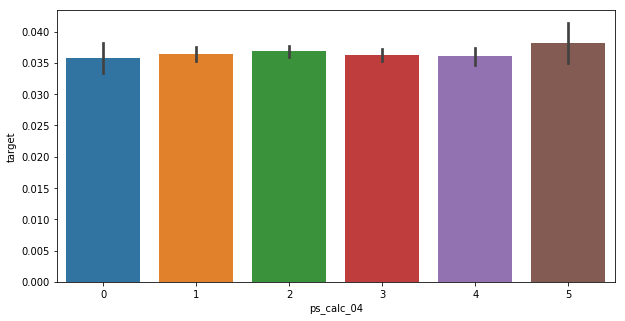

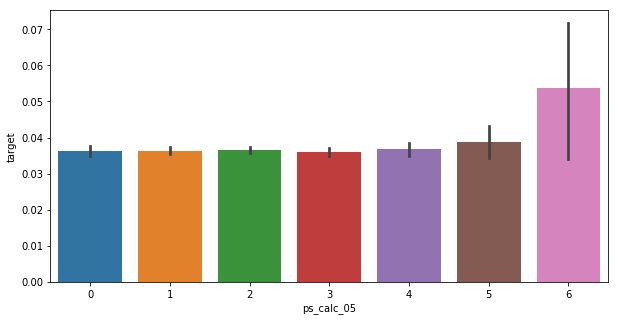

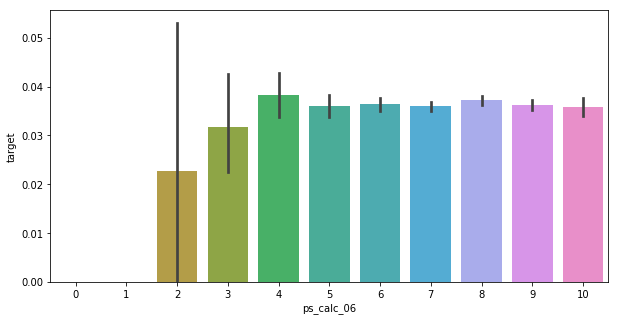

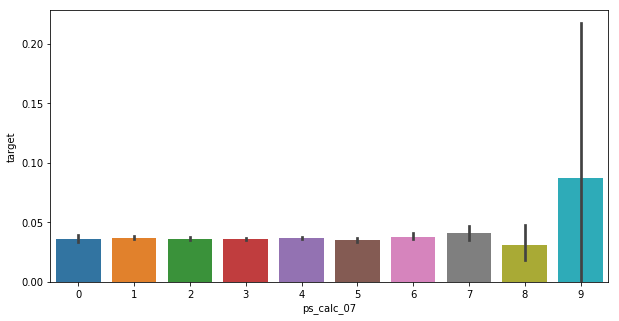

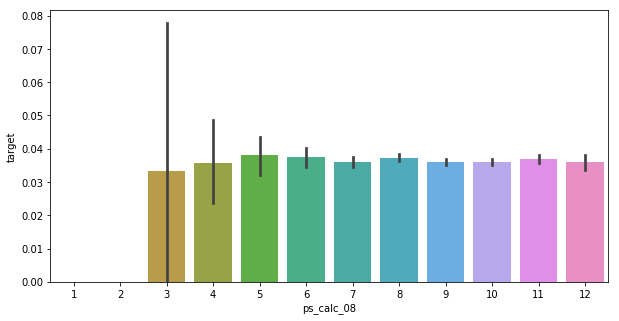

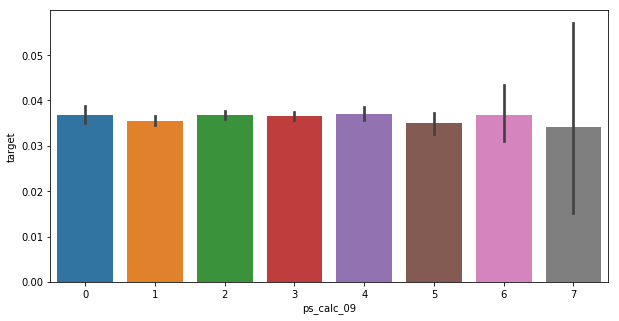

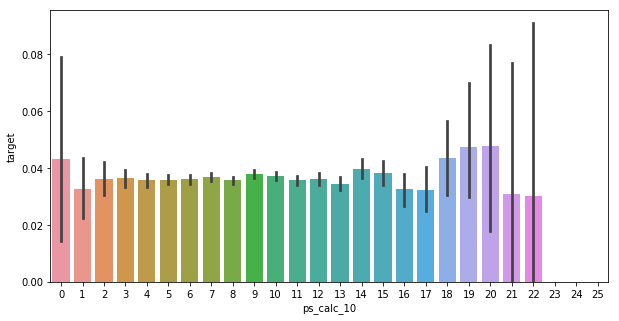

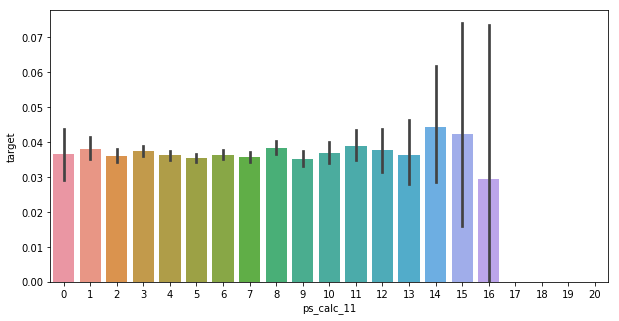

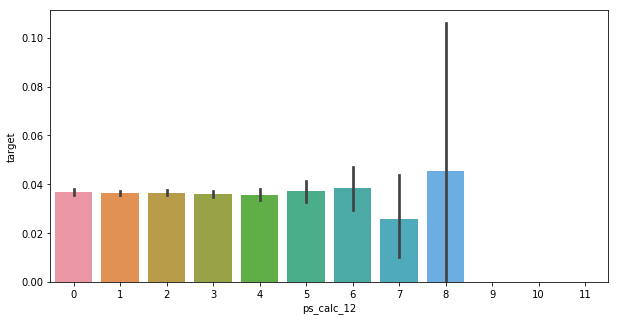

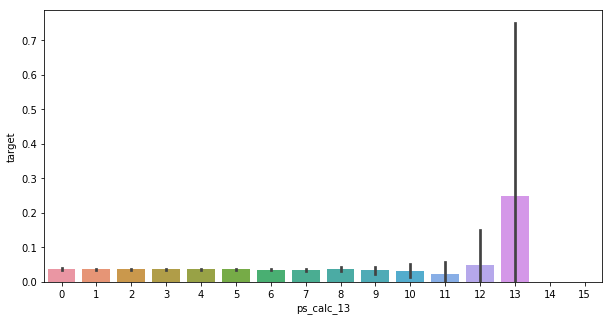

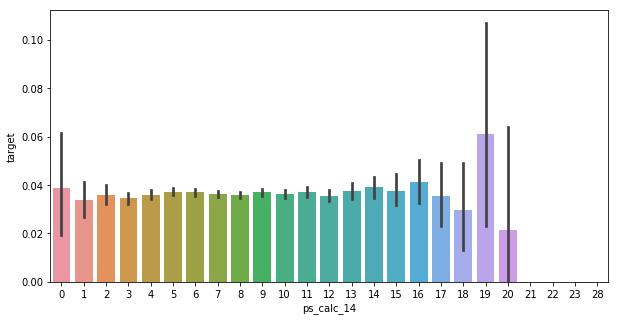

In [24]:
#단일 변수 vs 타겟 변수 시각화를 위한 함수
def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=col, y='target', data=data)
    plt.show()
    
#이진 변수, 범주형 변수 그리고 정수형 변수를 시각화한다.
for col in binary + category + integer:
    bar_plot_ci(col, df)

ps_ind_16_bin, ps_ind_06_bin 두 변수는 이진 변수의 값에 따라 타겟 변수의 비율이 다르다. 통계적 유효성을 충분히 지닌 두 변수는 모델링 관점에서 유용한 변수라고 할 수 있다. 반면, ps_ind_11_bin은 평균값 기준으로는 타겟 변수의 비율이 유의미하게 달라 보이지만, 통계적 유효성이 없다. ps_calc_06, ps_calc_07 두 변수는 특정 값에서의 타겟 비율의 95% 신뢰 구간이 너무 광범위하여 변수로써의 예측 능력이 많이 떨어진다. ps_ind_01, ps_ind_03 두 변수는 고유값별로 95% 신뢰 구간이 군집화되는 것으로 보아, 어느 정도 예측 능력을 보유하고 있는 것으로 보인다.

이와 같이 단일 변수별 타겟 변수의 비율과 95% 신뢰 구간 분석을 통해 모델을 학습하기 전에 변수들에 대한 예측 능력을 어느 정도 파악할 수 있다. 

## 훈련 데이터 vs 테스트 데이터 비교

테스트 데이터가 훈련 데이터의 1.5배 분량(892816/595212==1.499)이므로 훈련 데이터와 테스트 데이터의 단일 변수 히스토그램의 결과가 1.5배 비율을 유지한다면 훈련 데이터와 테스트 데이터의 분포가 서로 유사하다고 가정할 수 있다.

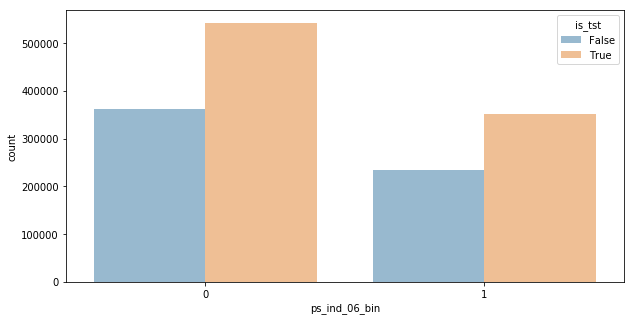

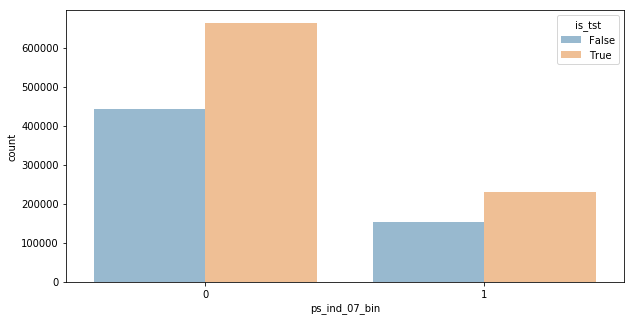

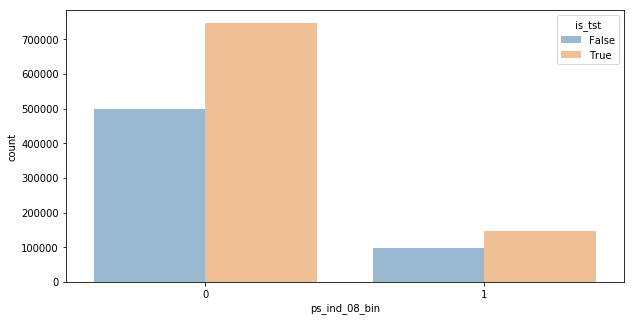

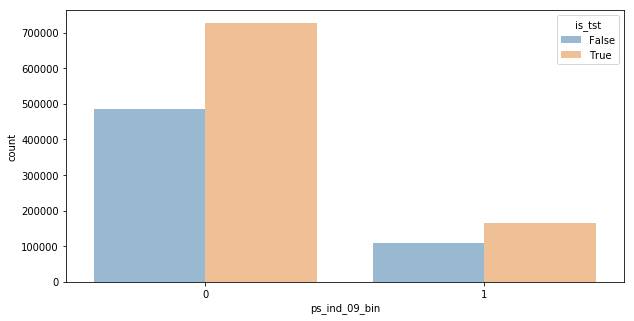

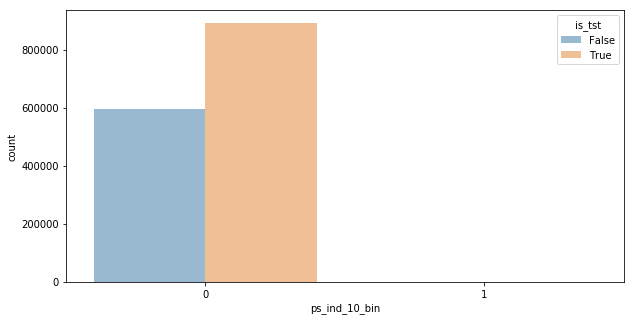

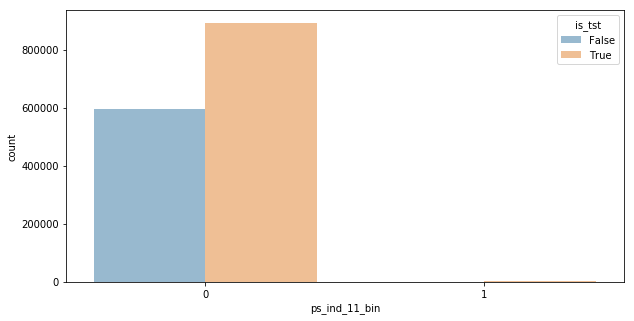

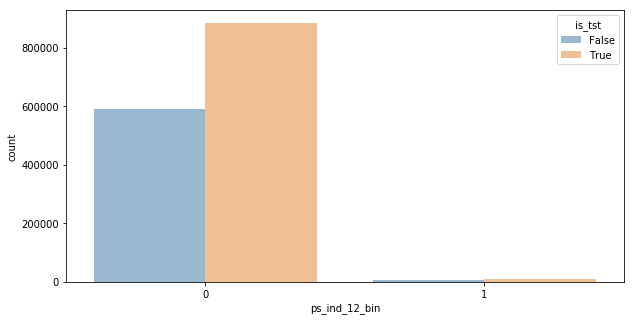

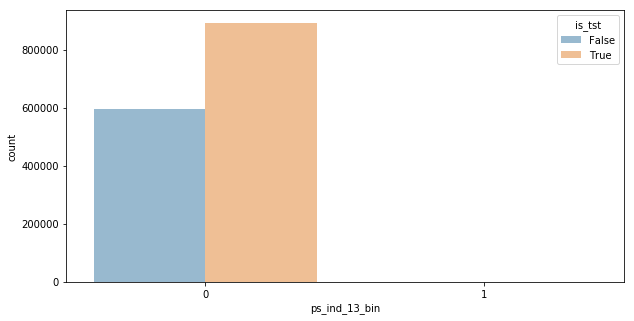

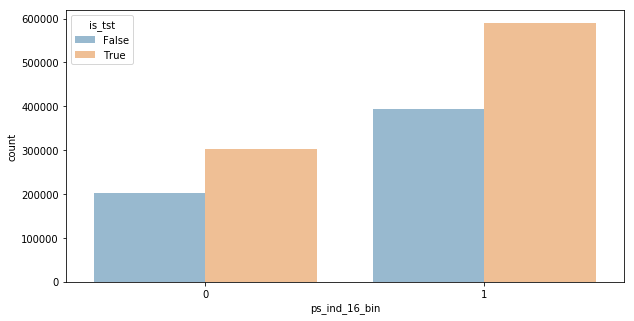

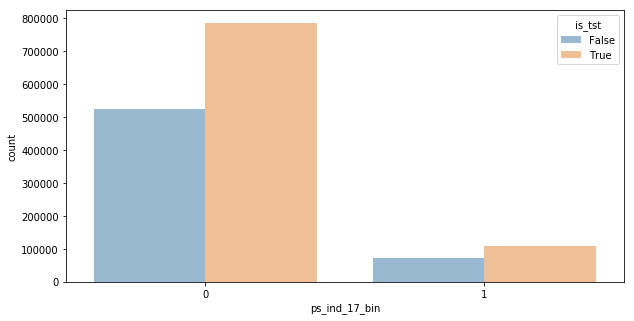

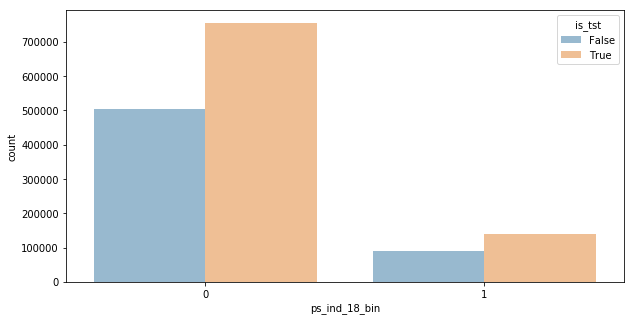

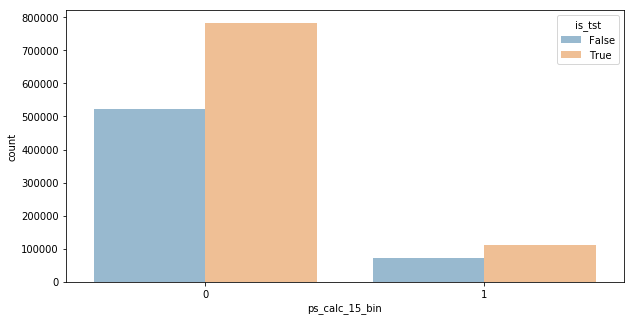

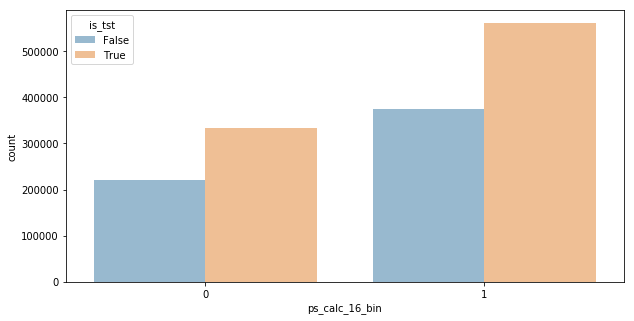

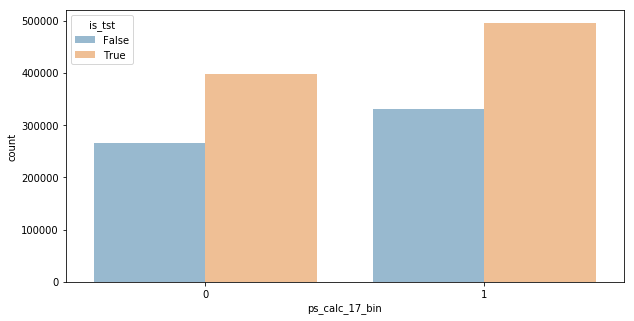

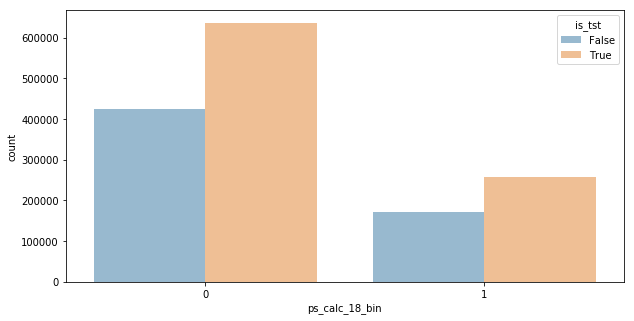

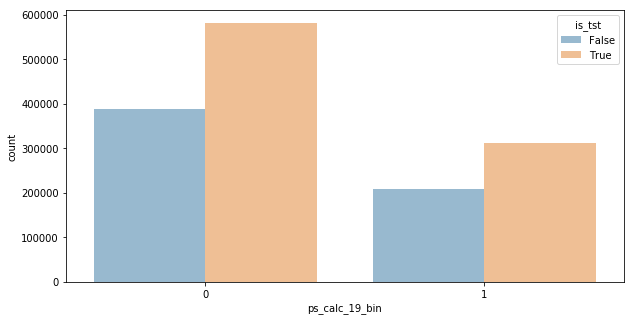

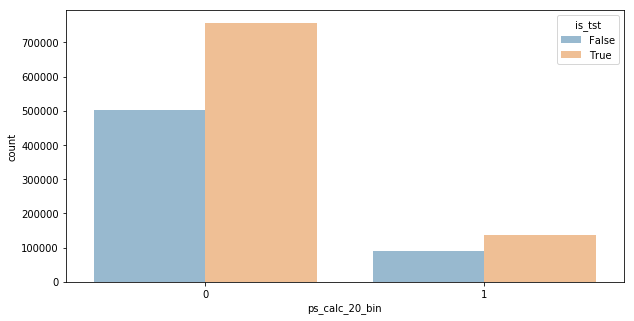

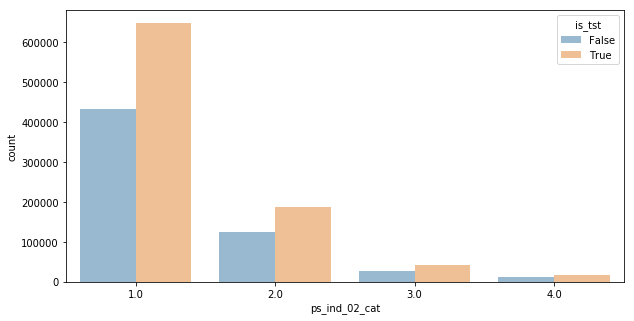

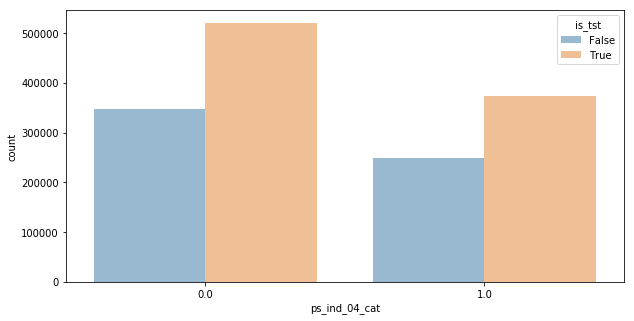

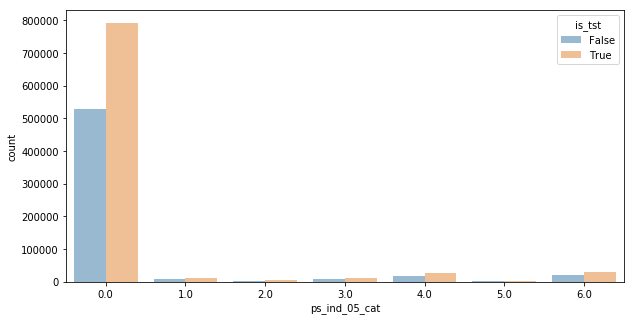

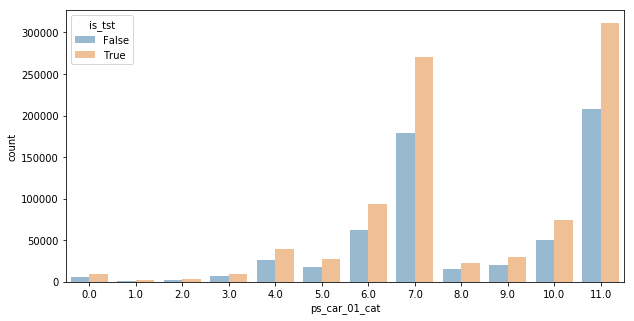

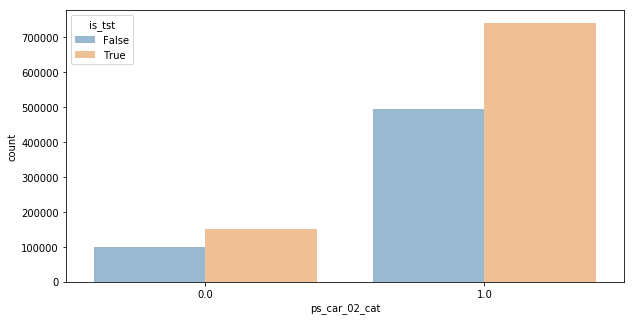

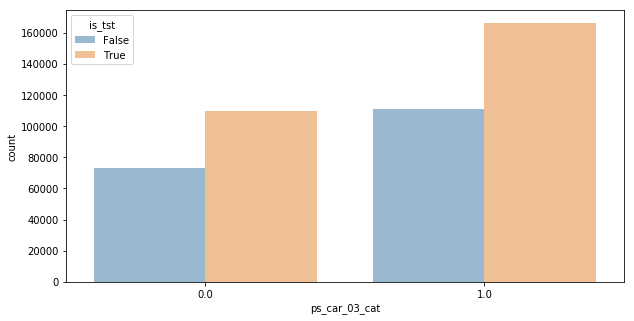

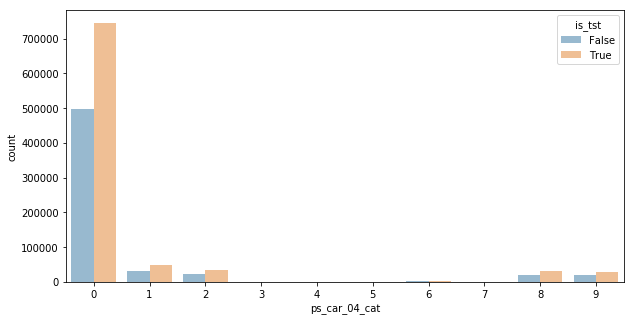

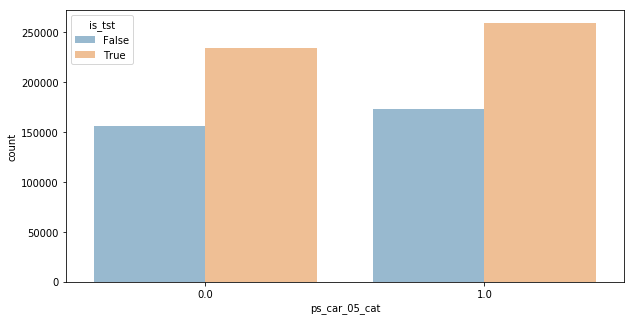

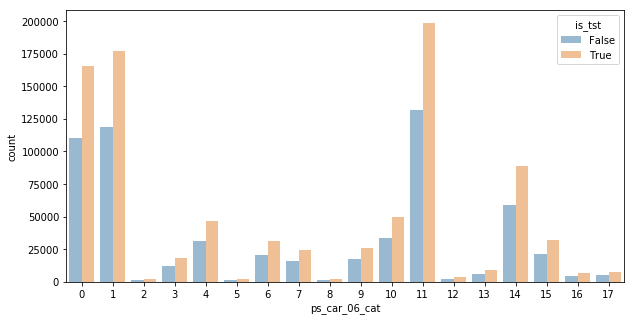

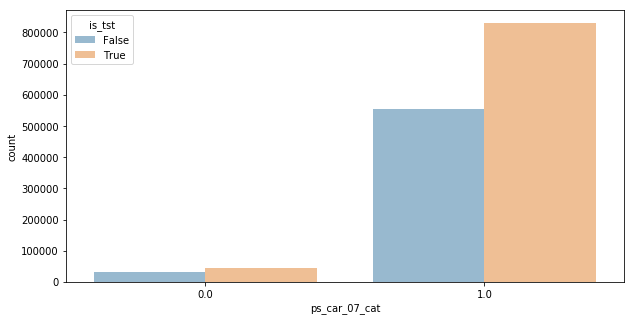

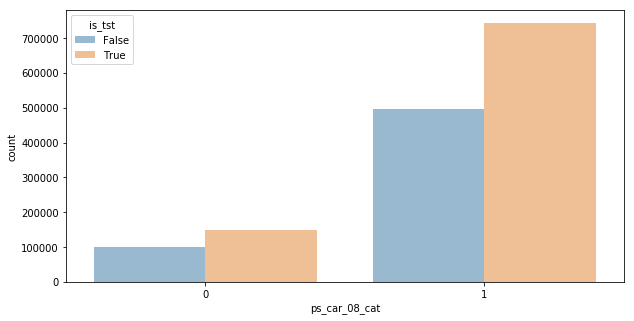

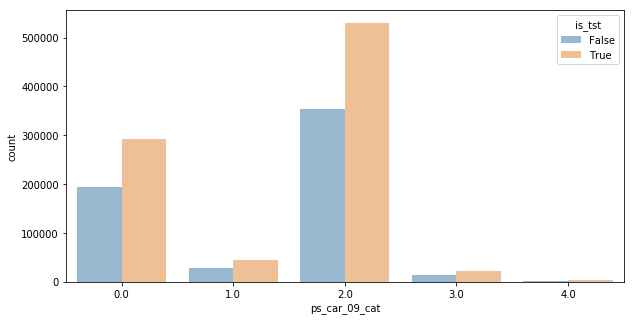

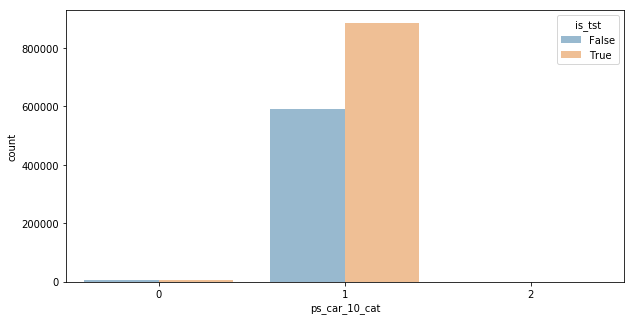

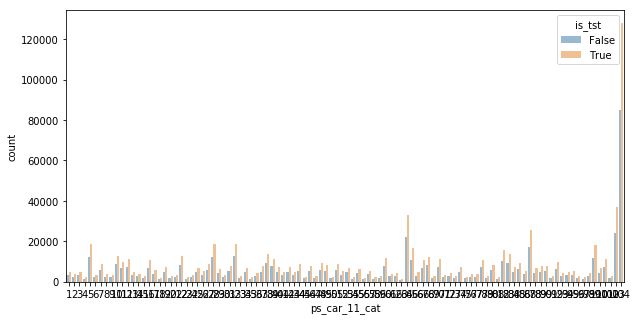

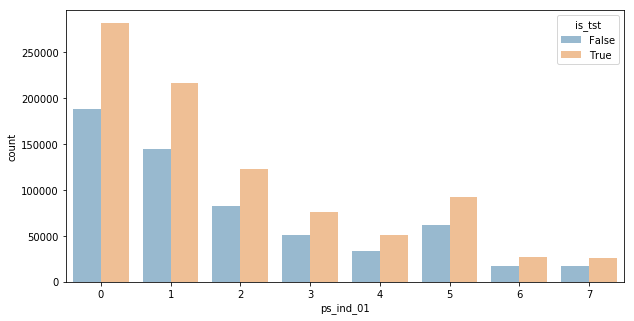

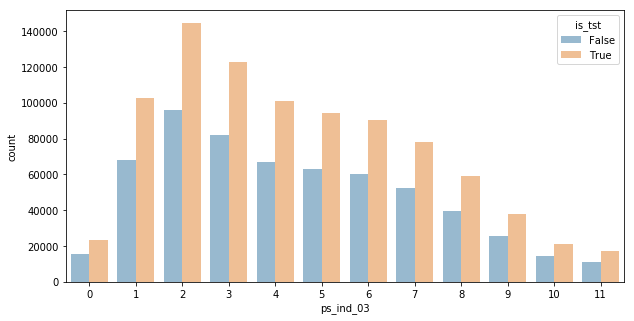

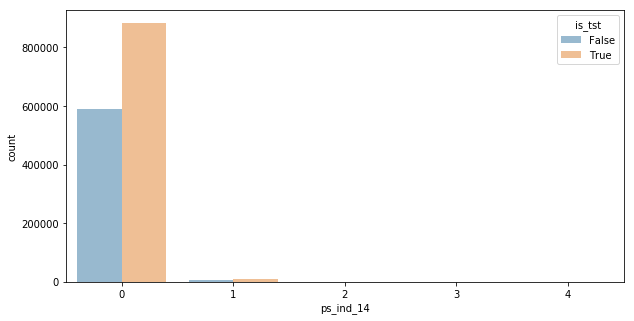

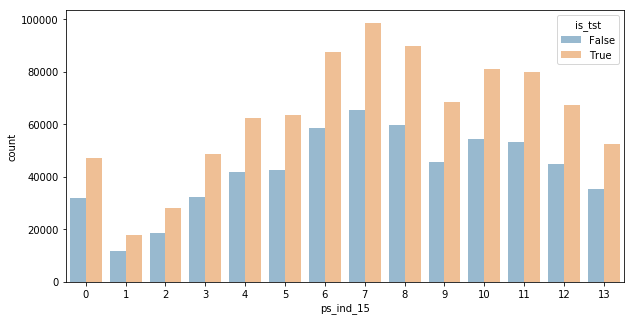

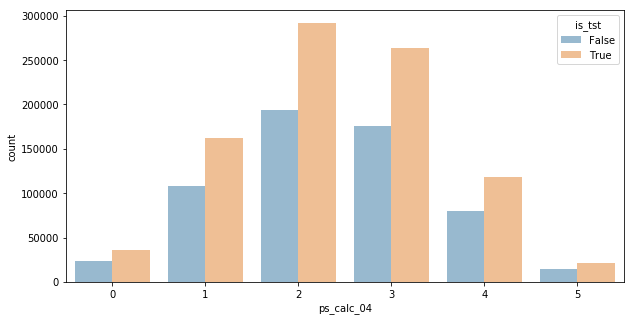

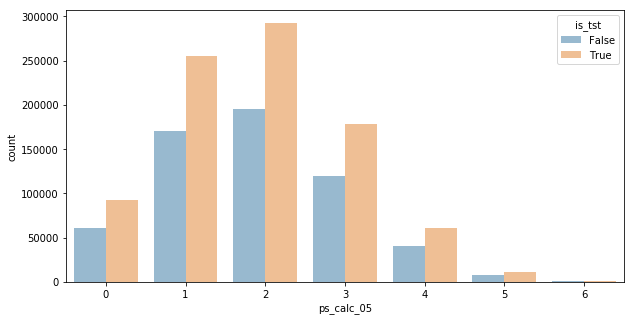

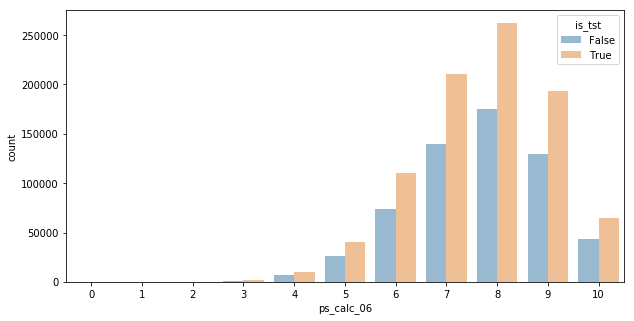

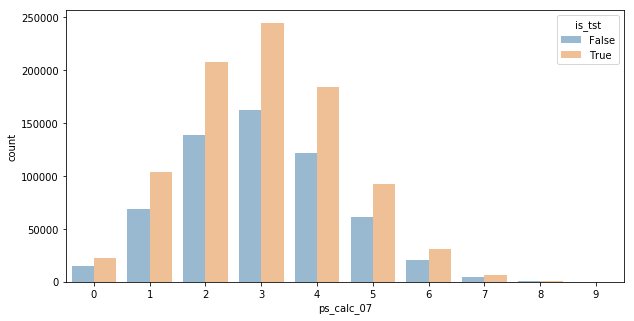

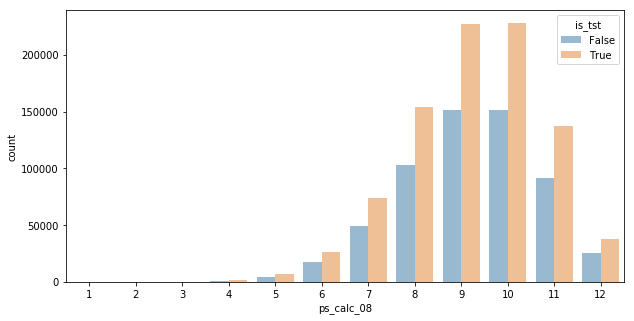

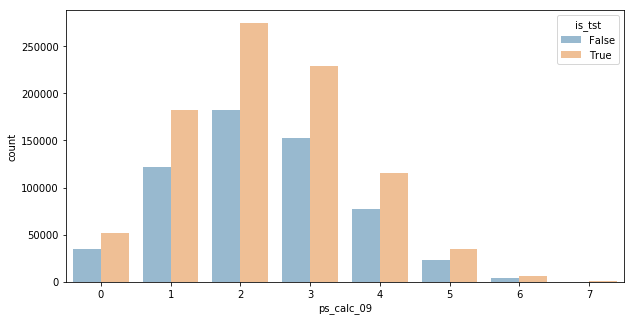

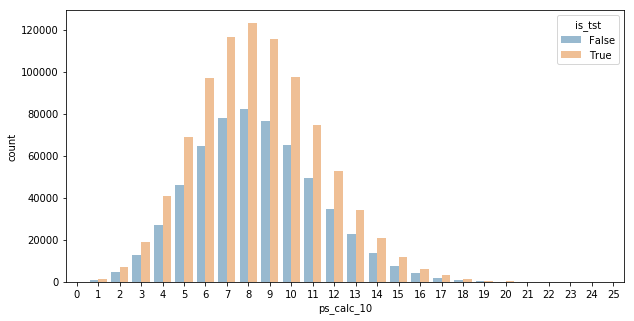

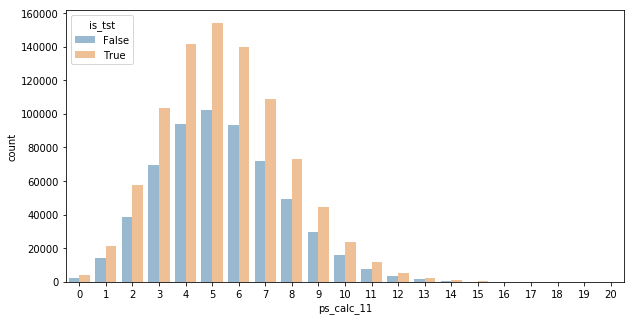

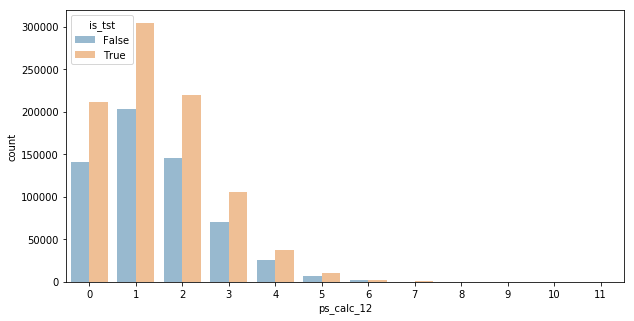

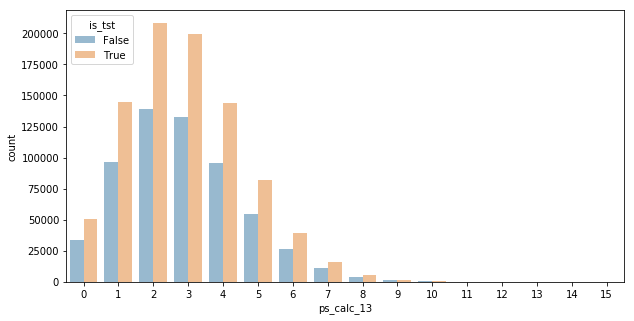

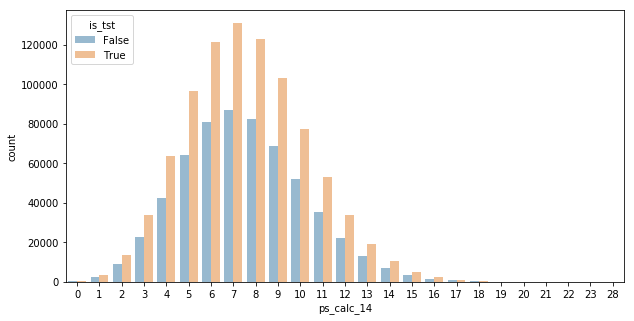

In [26]:
#테스트 데이터를 구별하기 위한 'is_tst' 변수 생성
df['is_tst'] = df['target'].isnull()

#이진 변수, 범주형 변수 그리고 정수형 변수를 시각화한다.
for col in binary + category + integer:
    bar_plot(col, df, 'is_tst')

모든 이진 변수에 대하여 테스트 데이터의 빈도가 훈련 데이터보다 1.5배 가량 높은 값을 가지고 있다.

범주형 데이터도 마찬가지로, 훈련 데이터와 테스트 데이터가 비슷한 분포를 가지고 있는 것을 확인할 수 있다.

정수형 변수에 대해서도 훈련 데이터와 테스트 데이터의 분포는 비슷하다.

# 요약

- 변수명을 통해 이진 변수, 범주형 변수, 정수형/소수형 변수를 구별할 수 있다.
- 철저한 익명화 과정으로 인해 변수가 가지는 값들을 이해하고 유의미한 파생 변수를 생성하는 과정이 다소 난해할 수 있다.